### PRACTICE END TO END MACHINE LEARNING (ECONOMIC OUTLOOK)
The core reason behind this piece of work is to put a thorough exploratory data analysis and key visualizations that drive critical insights in analytics and statistics, in details in one notebook. Please note that the emphasis is on the journey of the analysis much more than the level of accuracy. Before you begin with any data science project or any project in general, you must know why it is being built. 
#### For a data science project, you might be asked to do one or more of these tasks:
     -predict something
     -Explore the dataset and find reasons for something
In this case we will be building this model to predict **inflation for Nigeria using multiple linear regression**. From the name Data Science we see that Data is the most important cog of your data science project wheel, In this case we will be working with secondary data attached bellow.
#### Now we dive fully into our analysis by first importing all the libraries needed for the analysis



In [200]:
#Importing all the necessary libraries for the analysis

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Pandas provides tools for reading and writing data into data structures and files and also provides powerful aggregation functions to manipulate data.

NumPy overcomes slower executions with the use of multi dimensional array objects. It has inbuilt functions for manipulating arrays.

Matplotlib.pyplot; makes matplotlib work like MATLAB, Matplotlib is a plotting library.

seaborn is used for making statistical graphics. The central part of seaborn is visualization which helps in exploring and understanding data.

train_test_split is used to evaluate the performance of a machine learnin algorithm, in this case Regression problem. 

LinearRegression is used to solve the regression problem by predicting the target variable using the line of best fit(the best relationship between the independent and dependent variable) 

metrics is used to analyze the performance of the model

%matplotlib inline makes your plot outputs appear and be stored within the notebook

#### We read the data (excel file) saved in my PC into the notebook

In [201]:
#pd.read_excel is a pandas method
mydata = pd.read_excel(r'C:\Users\User\Desktop\PROGRAMMING ITEMS\african.xlsx')

#### We check the shape of our data, that is the number of rows and columns.

In [202]:
mydata.shape

(1732, 48)

#### Now lets take a look at our data by using mydata.head() which shows us all columns of the dataset and the first five rows only.

In [203]:
mydata.head(2) #.head() is a pandas function

,Country and Regions,Country and Regions Name,Country and Regions - RegionId,Indicators,Indicators Name,Scale,Units,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,NaN,3.000005,6.400001,...,2.900000,3.400000,2.800000,3.800000,3.700000,3.200000,1.40000,2.544479,2.689753,1.867171
1,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,NaN,-0.129448,3.131644,...,0.938334,1.345839,0.728063,1.743944,1.727994,1.333212,-0.34756,0.860358,1.075350,0.329201


#### lets see a larger picture of the dataset by calling the dataset by its name which shows us all rows and columns

In [204]:
mydata

,Country and Regions,Country and Regions Name,Country and Regions - RegionId,Indicators,Indicators Name,Scale,Units,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,NaN,3.000005,6.400001,...,2.900000,3.400000,2.800000,3.800000,3.700000,3.200000,1.400000,2.544479,2.689753,1.867171
1,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,NaN,-0.129448,3.131644,...,0.938334,1.345839,0.728063,1.743944,1.727994,1.333212,-0.347560,0.860358,1.075350,0.329201
2,DZA,Algeria,DZ,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,34512.329728,35547.701326,37822.754445,...,82306.010060,85104.414402,87487.338005,90811.856849,94171.895553,97185.396210,98545.991757,101053.473884,103771.562863,105709.155649
3,DZA,Algeria,DZ,NY.GDP.MKTP.CD,"Gross domestic product, current prices (curren...",millions,U.S. dollars,42345.827687,44371.759808,44779.983360,...,200019.103013,209059.083118,209755.003251,213809.978239,165967.810237,160132.094556,167552.812075,181354.494429,187422.917508,193705.489155
4,DZA,Algeria,DZ,NE.CON.TETC.CD,Final consumption expenditure (current US$),millions,U.S. dollars,24112.626875,26305.606595,27485.578776,...,103696.510707,109684.113910,112849.091074,120060.948870,103851.459393,102155.457084,104656.071799,110184.109060,113666.188267,117069.974688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,SSA,Sub-Saharan Africa,NaN,BG.WEO.ADB.CAB.GDP.ZS,Current account balance (As % of GDP),units,Percentage of GDP,-0.339211,-6.846689,-6.453001,...,-0.801623,-2.048641,-2.671717,-3.968057,-6.056041,-3.783243,-2.223782,-2.172056,-2.119139,-2.285076
1728,SSA,Sub-Saharan Africa,NaN,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",units,percentage,NaN,NaN,NaN,...,9.738610,10.298313,7.694117,7.459005,7.283639,11.263958,11.716643,9.760410,9.120216,8.479765
1729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1730,Source:,African Development Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleaning
From observation the dataset has different countries (the second column), But since we are only interested in predicting inflation for Nigeria, it implies rows for other countries are not useful in the analysis, this process of removing irrelevant information and making the data ready for proper analysis is called **Data cleaning**

In [205]:
#we want to consider only the rows containing nigeria

mydata1 = mydata[mydata['Country and Regions Name'] == 'Nigeria']
mydata1.head()

,Country and Regions,Country and Regions Name,Country and Regions - RegionId,Indicators,Indicators Name,Scale,Units,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1102,NGA,Nigeria,NG,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,NaN,20.838228,-1.053188,...,4.887387,4.279277,5.394416,6.309719,2.652693,-1.583065,0.824000,1.942723,2.340113,2.445497
1103,NGA,Nigeria,NG,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,NaN,17.601531,-3.595229,...,2.119094,1.524086,2.614626,3.519624,-0.022235,-4.127177,-1.762366,-0.653750,-0.250534,-0.133762
1104,NGA,Nigeria,NG,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,30445.470817,36789.767429,36402.301867,...,117250.679507,122268.161173,128863.814799,136994.758970,140628.809748,138402.563588,139543.000712,142253.934021,145582.836389,149143.060242
1105,NGA,Nigeria,NG,NY.GDP.MKTP.CD,"Gross domestic product, current prices (curren...",millions,U.S. dollars,60592.526142,62312.448573,53934.018069,...,414095.238505,460951.712209,513258.046204,554863.289257,494583.095076,404649.570538,375745.475265,409182.443364,458464.952758,512956.808745
1106,NGA,Nigeria,NG,NE.CON.TETC.CD,Final consumption expenditure (current US$),millions,U.S. dollars,48410.741711,53218.503130,45332.194900,...,306109.609667,306970.569907,412205.424499,444635.629972,417971.820183,351719.602385,317618.203141,333461.443419,379896.842103,429956.738272


#### Now we want to transpose the data, such that the present colon which contain years becomes the new rows

In [206]:
#transposing data
mydata2 = mydata1.transpose()
#check to see the present index 
mydata2.index

Index(['Country and Regions', 'Country and Regions Name',
       'Country and Regions - RegionId', 'Indicators', 'Indicators Name',
       'Scale', 'Units', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

#### Lets have a clear view of our transposed data now. 

In [207]:
mydata2

,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,...,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130
Country and Regions,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,...,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA
Country and Regions Name,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,...,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria
Country and Regions - RegionId,NG,NG,NG,NG,NG,NG,NG,NG,NG,NG,...,NG,NG,NG,NG,NG,NG,NG,NG,NG,NG
Indicators,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD.ZG,NY.GDP.MKTP.KD,NY.GDP.MKTP.CD,NE.CON.TETC.CD,NE.CON.GOVT.CD,NE.CON.PETC.CD,NE.GDI.TOTL.CD,NE.GDI.PVTE.CD,NE.GDI.PUB.CD,...,NE.IMP.GNFS.ZS,GC.BAL.CASH.GD.CD,GC.REV.TOTL.GD.CD,GC.XPN.TOTL.GD.CD,GC.BAL.CASH.GD.ZS,GC.REV.TOTL.GD.ZS,GC.XPN.TOTL.GD.ZS,BG.CAB.CD,BG.WEO.ADB.CAB.GDP.ZS,FP.CPI.TOTL.ZG
Indicators Name,Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (curren...",Final consumption expenditure (current US$),General government final consumption expenditu...,Household final consumption expenditure (curre...,Gross capital formation (current US$),"Gross capital formation, Private sector (curr...","Gross capital formation, Public sector (curre...",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants ...","Central government, total expenditure and net ...","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants ...","Central government, total expenditure and net ...","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Scale,units,units,millions,millions,millions,millions,millions,millions,millions,millions,...,units,millions,millions,millions,units,units,units,millions,units,units
Units,percentage,percentage,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,...,Percentage of GDP,U.S. dollars,U.S. dollars,U.S. dollars,Percentage of GDP,Percentage of GDP,Percentage of GDP,U.S. dollars,Percentage of GDP,percentage
1980,NaN,NaN,30445.5,60592.5,48410.7,6427.03,41983.7,12000.3,6660.27,5339.99,...,24.0153,-2230.34,12580.6,14810.9,-3.68088,20.7626,24.4435,5361.54,8.84852,NaN
1981,20.8382,17.6015,36789.8,62312.4,53218.5,7972.78,45245.7,11556.3,5977.71,5578.54,...,28.0388,-7450.16,7956.97,15407.1,-11.9561,12.7695,24.7256,-6144.75,-9.86119,20.7765
1982,-1.05319,-3.59523,36402.3,53934,45332.2,6850.94,38481.3,10487.5,5290.28,5197.21,...,23.0828,-8496.94,6802.09,15299,-15.7543,12.6119,28.3662,-7186.48,-13.3246,7.71226


#### Now we have to reset the index so the present index becomes a colunm which it is meant to be.

In [208]:
mydata3 = mydata2.reset_index()
#lets see the dataset 
mydata3

,index,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130
0,Country and Regions,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,...,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA
1,Country and Regions Name,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,...,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria
2,Country and Regions - RegionId,NG,NG,NG,NG,NG,NG,NG,NG,NG,...,NG,NG,NG,NG,NG,NG,NG,NG,NG,NG
3,Indicators,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD.ZG,NY.GDP.MKTP.KD,NY.GDP.MKTP.CD,NE.CON.TETC.CD,NE.CON.GOVT.CD,NE.CON.PETC.CD,NE.GDI.TOTL.CD,NE.GDI.PVTE.CD,...,NE.IMP.GNFS.ZS,GC.BAL.CASH.GD.CD,GC.REV.TOTL.GD.CD,GC.XPN.TOTL.GD.CD,GC.BAL.CASH.GD.ZS,GC.REV.TOTL.GD.ZS,GC.XPN.TOTL.GD.ZS,BG.CAB.CD,BG.WEO.ADB.CAB.GDP.ZS,FP.CPI.TOTL.ZG
4,Indicators Name,Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (curren...",Final consumption expenditure (current US$),General government final consumption expenditu...,Household final consumption expenditure (curre...,Gross capital formation (current US$),"Gross capital formation, Private sector (curr...",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants ...","Central government, total expenditure and net ...","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants ...","Central government, total expenditure and net ...","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
5,Scale,units,units,millions,millions,millions,millions,millions,millions,millions,...,units,millions,millions,millions,units,units,units,millions,units,units
6,Units,percentage,percentage,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,...,Percentage of GDP,U.S. dollars,U.S. dollars,U.S. dollars,Percentage of GDP,Percentage of GDP,Percentage of GDP,U.S. dollars,Percentage of GDP,percentage
7,1980,NaN,NaN,30445.5,60592.5,48410.7,6427.03,41983.7,12000.3,6660.27,...,24.0153,-2230.34,12580.6,14810.9,-3.68088,20.7626,24.4435,5361.54,8.84852,NaN
8,1981,20.8382,17.6015,36789.8,62312.4,53218.5,7972.78,45245.7,11556.3,5977.71,...,28.0388,-7450.16,7956.97,15407.1,-11.9561,12.7695,24.7256,-6144.75,-9.86119,20.7765
9,1982,-1.05319,-3.59523,36402.3,53934,45332.2,6850.94,38481.3,10487.5,5290.28,...,23.0828,-8496.94,6802.09,15299,-15.7543,12.6119,28.3662,-7186.48,-13.3246,7.71226


**Notice** we now have a new index, although the present first column is labelled index now, we will rename that later. 
For now notice the present headers or columns makes no sense, **we want row four(indicators name) to be the new columns** because looking at the data thoroughly you will see that thats the perfect column based on how a normal dataframe should be.


In [209]:
#lets have a closer look at row four
mydata3.iloc[[4]]


,index,1102,1103,1104,1105,1106,1107,1108,1109,1110,...,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130
4,Indicators Name,Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (curren...",Final consumption expenditure (current US$),General government final consumption expenditu...,Household final consumption expenditure (curre...,Gross capital formation (current US$),"Gross capital formation, Private sector (curr...",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants ...","Central government, total expenditure and net ...","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants ...","Central government, total expenditure and net ...","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"


##### We assign the value of row four to newcolumns, The function tolist() converts the values in index 4 to a list of values since .columns only takes list and we simply want to change our present column names


In [210]:
newcolumns = mydata3.iloc[4].tolist() #tolist() is a pandas function
newcolumns

['Indicators Name',
 'Real GDP growth (annual %)',
 'Real per Capita GDP Growth Rate (annual %)',
 'Gross domestic product, (constant prices US$)',
 'Gross domestic product, current prices (current US$)',
 'Final consumption expenditure  (current US$)',
 'General government final consumption expenditure (current US$)',
 'Household final consumption expenditure (current US$)',
 'Gross capital formation (current US$)',
 'Gross capital formation, Private sector  (current US$)',
 'Gross capital formation, Public sector  (current US$)',
 'Exports of goods and services (current US$)',
 'Imports of goods and services (current US$)',
 'Final consumption expenditure  (% of GDP)',
 'General government final consumption expenditure (% of GDP)',
 'Household final consumption expenditure  (% of GDP)',
 'Gross capital formation (% of GDP)',
 'Gross capital formation, Private sector (% GDP)',
 'Gross capital formation, Public sector (% GDP)',
 'Exports of goods and services (% of GDP)',
 'Imports of 

In [211]:
#now we assign the list to the column

mydata3.columns = newcolumns

In [212]:
#checking to see the new dataframe
mydata3

,Indicators Name,Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
0,Country and Regions,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,...,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA
1,Country and Regions Name,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,...,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria
2,Country and Regions - RegionId,NG,NG,NG,NG,NG,NG,NG,NG,NG,...,NG,NG,NG,NG,NG,NG,NG,NG,NG,NG
3,Indicators,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD.ZG,NY.GDP.MKTP.KD,NY.GDP.MKTP.CD,NE.CON.TETC.CD,NE.CON.GOVT.CD,NE.CON.PETC.CD,NE.GDI.TOTL.CD,NE.GDI.PVTE.CD,...,NE.IMP.GNFS.ZS,GC.BAL.CASH.GD.CD,GC.REV.TOTL.GD.CD,GC.XPN.TOTL.GD.CD,GC.BAL.CASH.GD.ZS,GC.REV.TOTL.GD.ZS,GC.XPN.TOTL.GD.ZS,BG.CAB.CD,BG.WEO.ADB.CAB.GDP.ZS,FP.CPI.TOTL.ZG
4,Indicators Name,Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (curren...",Final consumption expenditure (current US$),General government final consumption expenditu...,Household final consumption expenditure (curre...,Gross capital formation (current US$),"Gross capital formation, Private sector (curr...",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants ...","Central government, total expenditure and net ...","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants ...","Central government, total expenditure and net ...","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
5,Scale,units,units,millions,millions,millions,millions,millions,millions,millions,...,units,millions,millions,millions,units,units,units,millions,units,units
6,Units,percentage,percentage,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars,...,Percentage of GDP,U.S. dollars,U.S. dollars,U.S. dollars,Percentage of GDP,Percentage of GDP,Percentage of GDP,U.S. dollars,Percentage of GDP,percentage
7,1980,NaN,NaN,30445.5,60592.5,48410.7,6427.03,41983.7,12000.3,6660.27,...,24.0153,-2230.34,12580.6,14810.9,-3.68088,20.7626,24.4435,5361.54,8.84852,NaN
8,1981,20.8382,17.6015,36789.8,62312.4,53218.5,7972.78,45245.7,11556.3,5977.71,...,28.0388,-7450.16,7956.97,15407.1,-11.9561,12.7695,24.7256,-6144.75,-9.86119,20.7765
9,1982,-1.05319,-3.59523,36402.3,53934,45332.2,6850.94,38481.3,10487.5,5290.28,...,23.0828,-8496.94,6802.09,15299,-15.7543,12.6119,28.3662,-7186.48,-13.3246,7.71226


#### Clearly the first seven rolls, that is 0 to 6 is not useful in our analysis so we take it out by using index slicing

In [215]:
mydatanow = mydata3[7:]

In [216]:
mydatanow.head()
# clearly the rows has been sliced off

,Indicators Name,Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
7,1980,NaN,NaN,30445.5,60592.5,48410.7,6427.03,41983.7,12000.3,6660.27,...,24.0153,-2230.34,12580.6,14810.9,-3.68088,20.7626,24.4435,5361.54,8.84852,NaN
8,1981,20.8382,17.6015,36789.8,62312.4,53218.5,7972.78,45245.7,11556.3,5977.71,...,28.0388,-7450.16,7956.97,15407.1,-11.9561,12.7695,24.7256,-6144.75,-9.86119,20.7765
9,1982,-1.05319,-3.59523,36402.3,53934,45332.2,6850.94,38481.3,10487.5,5290.28,...,23.0828,-8496.94,6802.09,15299,-15.7543,12.6119,28.3662,-7186.48,-13.3246,7.71226
10,1983,-5.05045,-7.42755,34563.8,36507.7,30828.2,4716.89,26111.4,6600.11,3593.35,...,17.3317,-4718.61,3864.24,8582.86,-12.925,10.5847,23.5097,-5133.26,-14.0608,23.2012
11,1984,-2.02154,-4.46862,33865.1,26475.8,27598.7,2850.23,24748.5,5732.12,5047.99,...,40.9884,-1744.25,2478.61,4222.87,-6.5881,9.36182,15.9499,-1050.97,-3.96957,39.6011


#### We now raname the first column(indicators name) as year since it contains the years

In [217]:
mydata5 = mydatanow.rename({'Indicators Name': 'Year'}, axis=1)
#axis=1 indicates that we are referring to a column
mydata5.head()

,Year,Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
7,1980,NaN,NaN,30445.5,60592.5,48410.7,6427.03,41983.7,12000.3,6660.27,...,24.0153,-2230.34,12580.6,14810.9,-3.68088,20.7626,24.4435,5361.54,8.84852,NaN
8,1981,20.8382,17.6015,36789.8,62312.4,53218.5,7972.78,45245.7,11556.3,5977.71,...,28.0388,-7450.16,7956.97,15407.1,-11.9561,12.7695,24.7256,-6144.75,-9.86119,20.7765
9,1982,-1.05319,-3.59523,36402.3,53934,45332.2,6850.94,38481.3,10487.5,5290.28,...,23.0828,-8496.94,6802.09,15299,-15.7543,12.6119,28.3662,-7186.48,-13.3246,7.71226
10,1983,-5.05045,-7.42755,34563.8,36507.7,30828.2,4716.89,26111.4,6600.11,3593.35,...,17.3317,-4718.61,3864.24,8582.86,-12.925,10.5847,23.5097,-5133.26,-14.0608,23.2012
11,1984,-2.02154,-4.46862,33865.1,26475.8,27598.7,2850.23,24748.5,5732.12,5047.99,...,40.9884,-1744.25,2478.61,4222.87,-6.5881,9.36182,15.9499,-1050.97,-3.96957,39.6011


##### Notice the index started counting from 7 instead of 0? We fix this by resetting index but this time using **(drop=true)** so that the current index gets reset instaed of having a new index.

In [218]:
mydata6 = mydata5.reset_index(drop=True)
mydata6.head()

,Year,Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
0,1980,NaN,NaN,30445.5,60592.5,48410.7,6427.03,41983.7,12000.3,6660.27,...,24.0153,-2230.34,12580.6,14810.9,-3.68088,20.7626,24.4435,5361.54,8.84852,NaN
1,1981,20.8382,17.6015,36789.8,62312.4,53218.5,7972.78,45245.7,11556.3,5977.71,...,28.0388,-7450.16,7956.97,15407.1,-11.9561,12.7695,24.7256,-6144.75,-9.86119,20.7765
2,1982,-1.05319,-3.59523,36402.3,53934,45332.2,6850.94,38481.3,10487.5,5290.28,...,23.0828,-8496.94,6802.09,15299,-15.7543,12.6119,28.3662,-7186.48,-13.3246,7.71226
3,1983,-5.05045,-7.42755,34563.8,36507.7,30828.2,4716.89,26111.4,6600.11,3593.35,...,17.3317,-4718.61,3864.24,8582.86,-12.925,10.5847,23.5097,-5133.26,-14.0608,23.2012
4,1984,-2.02154,-4.46862,33865.1,26475.8,27598.7,2850.23,24748.5,5732.12,5047.99,...,40.9884,-1744.25,2478.61,4222.87,-6.5881,9.36182,15.9499,-1050.97,-3.96957,39.6011


##### Notice the dataset is properly arranged, Now we look for missing values in our dataset and treat them. Note that **true** indicates a missing value.


In [219]:
mydata6.isna()
#.isna() is a pandas function that searches for missing values in a dataset

,Year,Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
0,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### Lets get a total of all missing values in each column

In [220]:
mydata6.isna().sum()

Year                                                                     0
Real GDP growth (annual %)                                               1
Real per Capita GDP Growth Rate (annual %)                               1
Gross domestic product, (constant prices US$)                            0
Gross domestic product, current prices (current US$)                     0
Final consumption expenditure  (current US$)                             0
General government final consumption expenditure (current US$)           0
Household final consumption expenditure (current US$)                    0
Gross capital formation (current US$)                                    0
Gross capital formation, Private sector  (current US$)                   0
Gross capital formation, Public sector  (current US$)                    0
Exports of goods and services (current US$)                              0
Imports of goods and services (current US$)                              0
Final consumption expendi

#### lets have a clearer view using **.describes** which gives statistical information of our dataset.


In [221]:
mydata6.describe()

,Year,Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
count,41,40.000000,40.000000,41.000000,41.000000,41.00000,41.000000,41.000000,41.000000,41.000000,...,41.000000,40.000000,41.000000,41.000000,40.000000,41.000000,41.000000,41.000000,41.000000,40.0
unique,41,40.000000,40.000000,41.000000,41.000000,41.00000,41.000000,41.000000,41.000000,41.000000,...,41.000000,40.000000,41.000000,41.000000,40.000000,40.000000,41.000000,41.000000,41.000000,40.0
top,1987,-1.053188,-1.574816,60798.507264,23487.138742,28651.13501,2303.572429,26111.356402,6911.893981,4095.883685,...,14.276696,7613.176782,2495.866173,55949.513695,-1.011138,19.325364,28.366188,18780.399937,-1.186056,14.0
freq,1,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0


#### Lets also use **.info** which shows us the number of non null count present in each column

In [222]:
mydata6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 30 columns):
Year                                                                     41 non-null object
Real GDP growth (annual %)                                               40 non-null object
Real per Capita GDP Growth Rate (annual %)                               40 non-null object
Gross domestic product, (constant prices US$)                            41 non-null object
Gross domestic product, current prices (current US$)                     41 non-null object
Final consumption expenditure  (current US$)                             41 non-null object
General government final consumption expenditure (current US$)           41 non-null object
Household final consumption expenditure (current US$)                    41 non-null object
Gross capital formation (current US$)                                    41 non-null object
Gross capital formation, Private sector  (current US$)               

#### Notice that what we have in our columns are object, We will have to force these objects to become numeric values (Type Conversion) by using pandas method **pd.to_numeric.** 


In [223]:
mydata7 = mydata6.copy()

In [224]:
for column in mydata7.columns:
    mydata7[column] = pd.to_numeric(mydata7[column])

#### Now lets see the outcome of the type conversion


In [225]:
mydata7.info()
#notice we now have integers and floats data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 30 columns):
Year                                                                     41 non-null int64
Real GDP growth (annual %)                                               40 non-null float64
Real per Capita GDP Growth Rate (annual %)                               40 non-null float64
Gross domestic product, (constant prices US$)                            41 non-null float64
Gross domestic product, current prices (current US$)                     41 non-null float64
Final consumption expenditure  (current US$)                             41 non-null float64
General government final consumption expenditure (current US$)           41 non-null float64
Household final consumption expenditure (current US$)                    41 non-null float64
Gross capital formation (current US$)                                    41 non-null float64
Gross capital formation, Private sector  (current US$)        

#### Now we use the backward fill method ***bfill*** on the rows to treat the missing values
The backward fill method takes the value in front of the missing value and fills it into the place of the missing value backward.

In [226]:
mydata7 = mydata7.bfill(axis = 'rows')
# axis = rows indicates that the backward fill method takes its value from the row and not the column

#### Lets see if the missing values are all gone now.

In [227]:
mydata7.isna().sum()

#Notice the missing values are gone now

Year                                                                     0
Real GDP growth (annual %)                                               0
Real per Capita GDP Growth Rate (annual %)                               0
Gross domestic product, (constant prices US$)                            0
Gross domestic product, current prices (current US$)                     0
Final consumption expenditure  (current US$)                             0
General government final consumption expenditure (current US$)           0
Household final consumption expenditure (current US$)                    0
Gross capital formation (current US$)                                    0
Gross capital formation, Private sector  (current US$)                   0
Gross capital formation, Public sector  (current US$)                    0
Exports of goods and services (current US$)                              0
Imports of goods and services (current US$)                              0
Final consumption expendi

##### Now we have a clean and nicely structured dataset, lets save it as an excel file with the excel file extension **.xlsx** for future use.



In [193]:
mydata7.to_excel('Nigeria_economy_cleandata.xlsx')

### Now we proceed to do some Graphical Univariate Analysis
#### Graphical univariate analysis helps you understand and get information through the use of visuals, It is also important for presentations.
Lets see the relationship between **year** and **Gross domestic product, (constant prices US$)**

<function matplotlib.pyplot.show(*args, **kw)>

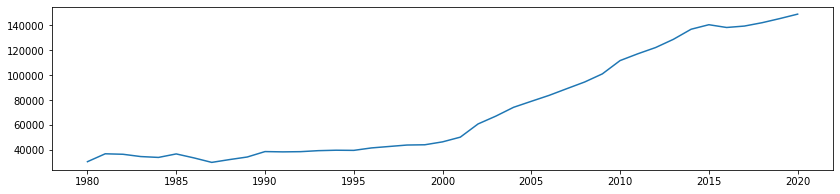

In [228]:
plt.figure(figsize=(14,3)) #How big we want our plot size 
plt.plot(mydata7['Year'], mydata7['Gross domestic product, (constant prices US$)'])
plt.show


#Gross domestic product, (constant prices US$) increases over the years and 
#has its highest value in year 2020.

#### Lets see what we have just done again using **scattered plot**

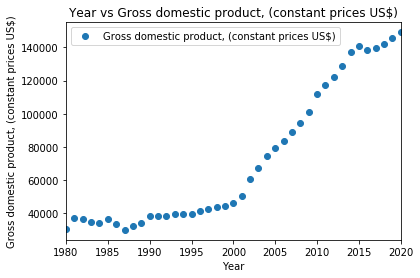

In [229]:
mydata7.plot(x='Year' , y='Gross domestic product, (constant prices US$)' , style='o')
plt.title('Year vs Gross domestic product, (constant prices US$)')
plt.xlabel('Year')
plt.ylabel('Gross domestic product, (constant prices US$)')
plt.show()

#### Lets take a look at **Year** against **Household final consumption expenditure (current US$)**

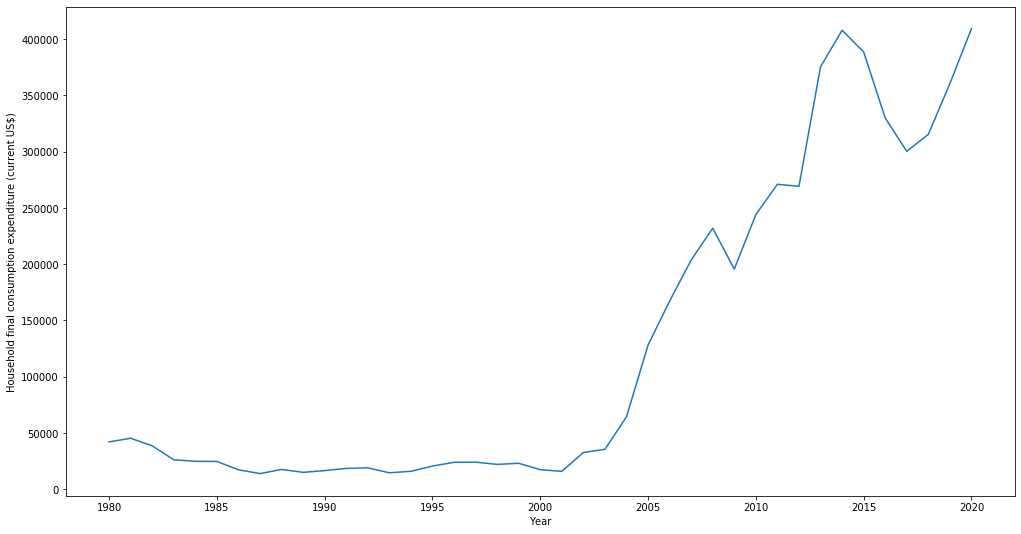

In [230]:
plt.figure(figsize=(17,9))
sns.lineplot(x='Year', y='Household final consumption expenditure (current US$)', data=mydata7)
plt.show()


### Lets use subplots for four graphs

**Year** against **Gross domestic product, (constant prices US$)**

**Year** against **Current account balance (Net, BoP, cur. US$)**

**Year** against **Final consumption expenditure  (% of GDP)**

**Year** against **Inflation, consumer prices (annual %)**

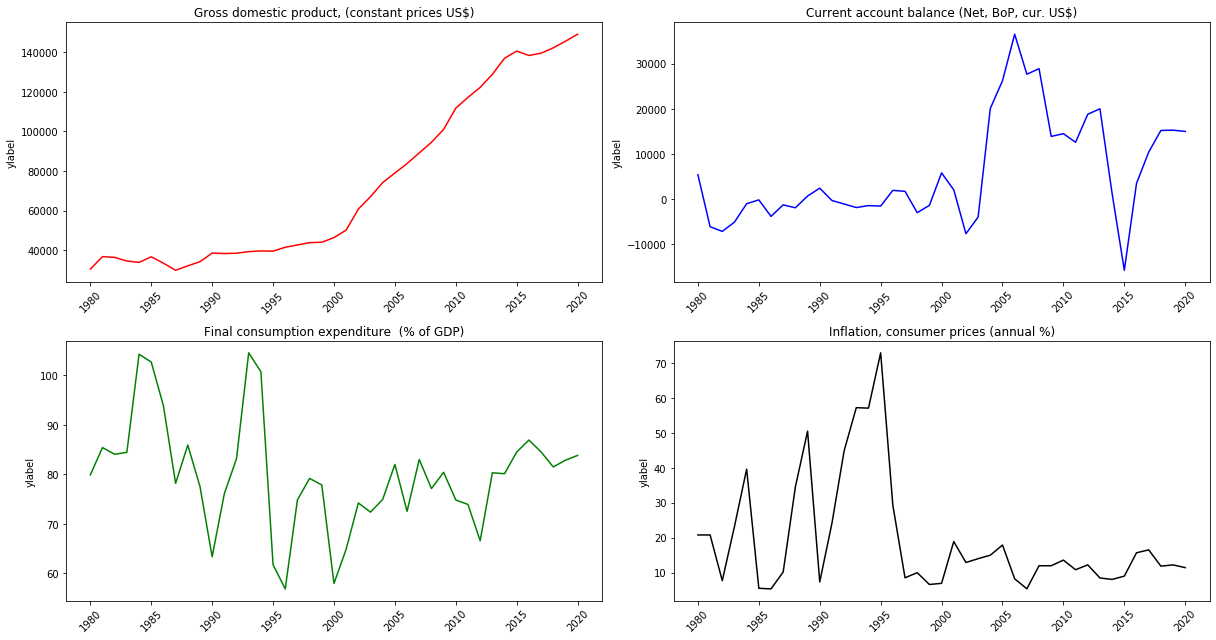

In [231]:
fig, ax=plt.subplots(2,2, figsize=(17,9)) #(2,2) means we want the four graphs arranged in two rows and two columns

ax[0, 0].plot(mydata7['Year'], mydata7['Gross domestic product, (constant prices US$)'], 'r') #r means red color
ax[0, 1].plot(mydata7['Year'], mydata7['Current account balance (Net, BoP, cur. US$)'], 'b') #b means blues color
ax[1, 0].plot(mydata7['Year'], mydata7['Final consumption expenditure  (% of GDP)'], 'g') #g means green color
ax[1, 1].plot(mydata7['Year'], mydata7['Inflation, consumer prices (annual %)'], 'k') #k means black color

ax[0,0].tick_params(axis='x', labelrotation = 45)
ax[0,1].tick_params(axis='x', labelrotation = 45)
ax[1,0].tick_params(axis='x', labelrotation = 45)
ax[1,1].tick_params(axis='x', labelrotation = 45)

ax[0, 0].set_title("Gross domestic product, (constant prices US$)")
ax[1, 0].set_title("Final consumption expenditure  (% of GDP)")
ax[0, 1].set_title("Current account balance (Net, BoP, cur. US$)")
ax[1, 1].set_title("Inflation, consumer prices (annual %)")

ax[0, 0].set_ylabel('ylabel')
ax[0, 1].set_ylabel('ylabel')
ax[1, 0].set_ylabel('ylabel')
ax[1, 1].set_ylabel('ylabel')


fig.tight_layout() #automatically adjusts subplot params so that the subplots fits into the figure area.
plt.show()


### Lets plot **Year** against **Gross domestic product, (constant prices US$)** and **Inflation, consumer prices (annual %)** in one graph

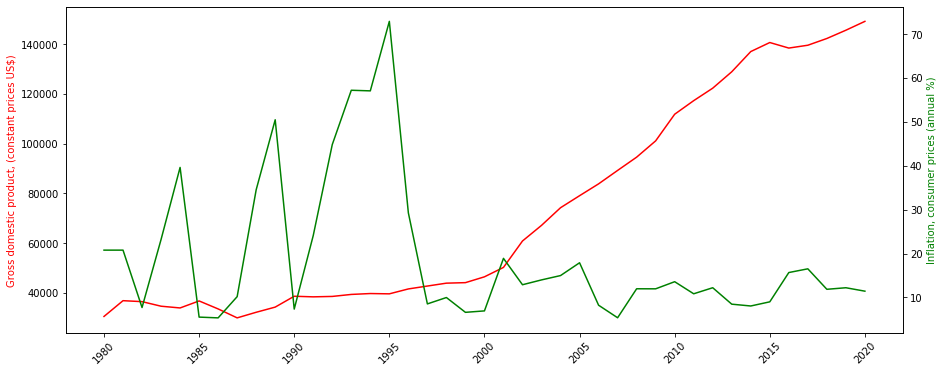

In [232]:
fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.plot(mydata7['Year'], mydata7['Gross domestic product, (constant prices US$)'], 'r-')
ax2.plot(mydata7['Year'], mydata7['Inflation, consumer prices (annual %)'], 'g-')

ax1.set_ylabel('Gross domestic product, (constant prices US$)', color='r')
ax2.set_ylabel('Inflation, consumer prices (annual %)', color='g')

ax1.tick_params(axis='x', labelrotation = 45)
ax1.tick_params(axis='x', labelrotation = 45)

plt.show()

In [233]:
mydata8 = mydata7.copy()

### Multiple Linear Regression Correlation Analysis (Using Heat Maps)

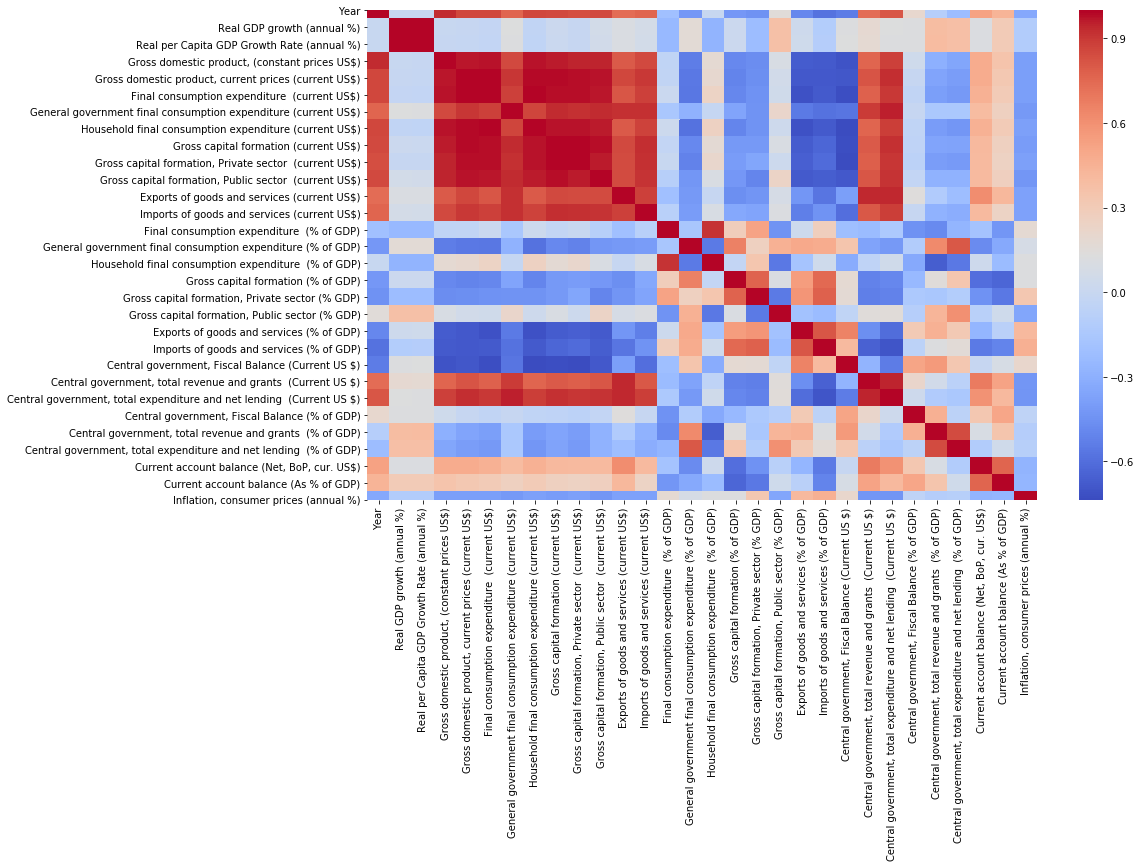

In [234]:
plt.figure(figsize=(15,9))
corr_data = mydata8.corr()
sns.heatmap(corr_data, cmap='coolwarm') #cmap='coolwarm' is just the colour map I want

#negatively correlated is 0.0 downwards and positively corrrelated is 0.0 upward 

### Lets get a clearer picture of the pairwise correlation of all columns in the dataframe.

In [235]:
mydata8.corr()

,Year,Real GDP growth (annual %),Real per Capita GDP Growth Rate (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,1.000000,-0.001144,-0.002593,0.934378,0.863168,0.860176,0.766080,0.859127,0.851788,0.841072,...,-0.581194,-0.541951,0.736978,0.810373,0.206300,-0.096570,-0.224539,0.529947,0.441672,-0.342182
Real GDP growth (annual %),-0.001144,1.000000,0.999946,-0.003574,-0.005283,-0.022053,0.126427,-0.033908,0.019198,-0.004702,...,-0.109875,0.121772,0.190680,0.130653,0.120999,0.394989,0.376294,0.117933,0.307442,-0.117683
Real per Capita GDP Growth Rate (annual %),-0.002593,0.999946,1.000000,-0.007678,-0.010761,-0.027409,0.120590,-0.039170,0.013712,-0.010287,...,-0.104667,0.125747,0.185378,0.124860,0.123138,0.399037,0.379603,0.114986,0.306447,-0.114568
"Gross domestic product, (constant prices US$)",0.934378,-0.003574,-0.007678,1.000000,0.969860,0.973117,0.852312,0.973097,0.960052,0.952050,...,-0.681632,-0.702799,0.764486,0.882671,0.037891,-0.298473,-0.349680,0.481543,0.354511,-0.386625
"Gross domestic product, current prices (current US$)",0.863168,-0.005283,-0.010761,0.969860,1.000000,0.995596,0.911833,0.992335,0.989480,0.984587,...,-0.684204,-0.693830,0.821627,0.927764,-0.009816,-0.358724,-0.394732,0.482799,0.327255,-0.390000
Final consumption expenditure (current US$),0.860176,-0.022053,-0.027409,0.973117,0.995596,1.000000,0.884465,0.999279,0.984982,0.980579,...,-0.680527,-0.726045,0.782040,0.903161,-0.035687,-0.387400,-0.411519,0.453146,0.306528,-0.383816
General government final consumption expenditure (current US$),0.766080,0.126427,0.120590,0.852312,0.911833,0.884465,1.000000,0.866118,0.933722,0.921713,...,-0.585735,-0.571949,0.892110,0.956263,-0.005886,-0.148567,-0.149514,0.399550,0.266539,-0.414138
Household final consumption expenditure (current US$),0.859127,-0.033908,-0.039170,0.973097,0.992335,0.999279,0.866118,1.000000,0.979185,0.975445,...,-0.681352,-0.731233,0.765174,0.889702,-0.037750,-0.402908,-0.428667,0.452921,0.306679,-0.377466
Gross capital formation (current US$),0.851788,0.019198,0.013712,0.960052,0.989480,0.984982,0.933722,0.979185,1.000000,0.995401,...,-0.633787,-0.723001,0.802954,0.920746,-0.048567,-0.358290,-0.367285,0.410488,0.261941,-0.401267
"Gross capital formation, Private sector (current US$)",0.841072,-0.004702,-0.010287,0.952050,0.984587,0.980579,0.921713,0.975445,0.995401,1.000000,...,-0.610126,-0.736161,0.788213,0.911293,-0.059755,-0.396032,-0.408916,0.407583,0.252378,-0.380729


### Lets do a distance plot of **Inflation, consumer prices (annual %)**

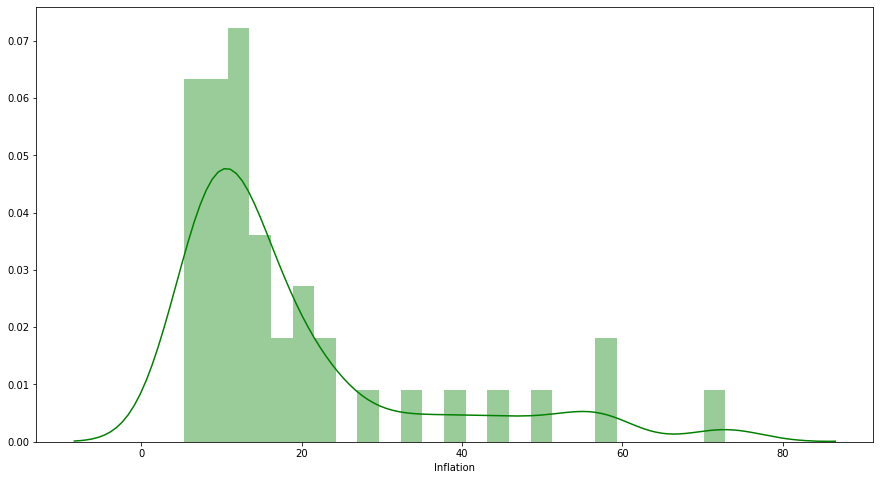

In [236]:
plt.figure(figsize=(15,8))

#Organize Data
inf_dist = pd.Series(mydata8['Inflation, consumer prices (annual %)'], name="Inflation")

#Plot Data
sns.distplot(inf_dist, bins=25, color="g")
plt.show()

### Let's Do a Multiple Linear Regression Using **Scikit Learn**


In [237]:
from sklearn import linear_model
import statsmodels.api as sm
#set x to everyother variable except inflation
X = mydata8[['Real GDP growth (annual %)',
       'Real per Capita GDP Growth Rate (annual %)',
       'Gross domestic product, (constant prices US$)',
       'Gross domestic product, current prices (current US$)',
       'Final consumption expenditure  (current US$)',
       'General government final consumption expenditure (current US$)',
       'Household final consumption expenditure (current US$)',
       'Gross capital formation (current US$)',
       'Gross capital formation, Private sector  (current US$)',
       'Gross capital formation, Public sector  (current US$)',
       'Exports of goods and services (current US$)',
       'Imports of goods and services (current US$)',
       'Final consumption expenditure  (% of GDP)',
       'General government final consumption expenditure (% of GDP)',
       'Household final consumption expenditure  (% of GDP)',
       'Gross capital formation (% of GDP)',
       'Gross capital formation, Private sector (% GDP)',
       'Gross capital formation, Public sector (% GDP)',
       'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Central government, Fiscal Balance (Current US $)',
       'Central government, total revenue and grants  (Current US $)',
       'Central government, total expenditure and net lending  (Current US $)',
       'Central government, Fiscal Balance (% of GDP)',
       'Central government, total revenue and grants  (% of GDP)',
       'Central government, total expenditure and net lending  (% of GDP)',
       'Current account balance (Net, BoP, cur. US$)',
       'Current account balance (As % of GDP)']]
#set y(dependent variable) to inflation
Y = mydata8['Inflation, consumer prices (annual %)']

#### scaling or standardization is a step in Data pre processing which is applied to independent variables or feature data. It basically helps to normalize data within a certain range and sometimes helps in speeding up calculations in an algorithm.


In [239]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
scaled_X = sc_X.fit_transform(X)

In [240]:
scaled_X

array([[ 2.44371723,  2.42801211, -1.00353287, ...,  0.66462569,
        -0.03025008,  0.98733128],
       [ 2.44371723,  2.42801211, -0.85133019, ...,  0.69852057,
        -1.03594446, -1.16204021],
       [-0.85880323, -0.86445796, -0.86062567, ...,  1.13593209,
        -1.1269956 , -1.55991372],
       ...,
       [-0.40684266, -0.4075612 ,  1.67880516, ..., -0.95177682,
         0.8280262 ,  0.39703327],
       [-0.34689271, -0.34493003,  1.75866711, ..., -0.99974947,
         0.83406815,  0.35294909],
       [-0.33099453, -0.32679201,  1.84407857, ..., -1.03385484,
         0.80961058,  0.30608769]])

### Now lets get the equation for the model that is Y= mx + c, where c is the intercept and m is the coefficient of x(gradient)

In [241]:
regr = linear_model.LinearRegression()
regr.fit(scaled_X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 19.24124972396622
Coefficients: 
 [-1.03942632e+03  1.04101850e+03 -1.93986992e+01 -1.59882757e+02
 -3.61313481e+08  2.74363703e+07  3.37290078e+08  2.44452966e+08
 -1.58577946e+08 -8.79265278e+07  2.77443863e+01 -3.28594526e+01
 -1.61588505e+12  7.74965754e+11  1.90362065e+12  1.11402322e+12
 -1.32883275e+12 -8.53133142e+11 -2.07595940e+01  3.46585640e+01
 -4.17066926e+01  1.18981140e+02 -1.07424238e+02  5.14394315e+01
 -1.11557198e+02  9.02159359e+01 -4.20252974e+00  1.34653072e+01]


### Now lets predict the **value of Y** (dependent variable that is inflation in this case).

In [242]:
y_pred = regr.predict(scaled_X)

### Lets compare the values of y_pred and real y

In [243]:
df = pd.DataFrame({'Actual': Y, 'predicted': y_pred.flatten()})
df

,Actual,predicted
0,20.776498,5.040523
1,20.776498,33.230241
2,7.712262,11.206647
3,23.201186,10.762026
4,39.601127,31.125517
5,5.530642,21.148638
6,5.356809,16.274509
7,10.187296,26.533816
8,34.516158,37.368412
9,50.452078,38.212039


### Lets take a look at the mean absolute error of the model

In [244]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, y_pred)) 

Mean Absolute Error: 6.966935132296664


### Lets use the **statsmodel** this time around

In [246]:
import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X.values).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                      OLS Regression Results                                     
Dep. Variable:     Inflation, consumer prices (annual %)   R-squared:                       0.599
Model:                                               OLS   Adj. R-squared:                 -0.001
Method:                                    Least Squares   F-statistic:                    0.9978
Date:                                   Sun, 18 Jul 2021   Prob (F-statistic):              0.514
Time:                                           16:52:28   Log-Likelihood:                -153.29
No. Observations:                                     41   AIC:                             356.6
Df Residuals:                                         16   BIC:                             399.4
Df Model:                                             24                                         
Covariance Type:                               nonrobust                                         
                 coe

### Lets take a look at the predictions from statsmodel

In [247]:
print(predictions)


0      6.525841
1     28.287936
2     15.006768
3     12.488454
4     27.724667
5     18.940399
6     20.311360
7     27.043163
8     40.159544
9     31.072122
10    11.330727
11    18.167795
12    25.746824
13    55.515296
14    48.575519
15    45.145891
16    39.353869
17    38.186294
18    13.320784
19     9.303048
20     9.784846
21    18.332489
22    13.926766
23    14.083124
24    21.613711
25    17.745755
26     4.665194
27     6.473432
28    12.569385
29    12.153448
30    17.902658
31     2.930125
32    11.033215
33     9.847870
34    13.877843
35     8.755379
36     6.712123
37    10.583424
38    13.963006
39    14.731710
40    15.047965
dtype: float64


### And this is our Y alone

In [248]:
Y

0     20.776498
1     20.776498
2      7.712262
3     23.201186
4     39.601127
5      5.530642
6      5.356809
7     10.187296
8     34.516158
9     50.452078
10     7.357041
11    24.103010
12    44.804795
13    57.169042
14    57.030042
15    72.851856
16    29.261548
17     8.535616
18     9.988820
19     6.617552
20     6.944444
21    18.900000
22    12.900000
23    14.000000
24    14.987264
25    17.900000
26     8.239527
27     5.382224
28    11.980000
29    11.970000
30    13.590000
31    10.840028
32    12.217782
33     8.475827
34     8.062486
35     9.009387
36    15.675341
37    16.523540
38    11.862134
39    12.215269
40    11.434641
Name: Inflation, consumer prices (annual %), dtype: float64

### I hope this helps some scientist searching for a python implementation.